In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Using KNN

In [2]:
heart=pd.read_csv(r'C:\Users\User\Downloads\heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
x=heart.drop('target',axis=1)
y=heart[['target']]

# scaling using normalization

In [5]:
normal_scaler=MinMaxScaler()
x_scaled=normal_scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [7]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.77      0.74      0.75        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [31]:
cls_report_train=classification_report(y_train,y_pred_train)
print(cls_report_train)

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       108
           1       0.84      0.92      0.88       134

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.86       242
weighted avg       0.86      0.86      0.86       242



In [9]:
confusion_matrix(y_test,y_pred)

array([[23,  7],
       [ 8, 23]], dtype=int64)

In [32]:
confusion_matrix(y_train,y_pred_train)

array([[ 85,  23],
       [ 11, 123]], dtype=int64)

In [10]:
accuracy_score(y_test,y_pred)

0.7540983606557377

In [33]:
accuracy_score(y_train,y_pred_train)

0.859504132231405

In [34]:
#hyper parameter tuning
n_neighbors = list(range(3,30))
p = [1,2]
hyperparameters = dict(n_neighbors = n_neighbors, p = p)
knn_new=KNeighborsClassifier()
rdcv=RandomizedSearchCV(knn_new,hyperparameters,cv=5)
knn_model=rdcv.fit(x_train,y_train)
knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=20, p=1)

In [35]:
y_pred_best=knn_model.predict(x_test)
accuracy_score(y_test,y_pred_best)

0.7540983606557377

In [14]:
y_pred_prob = knn_model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

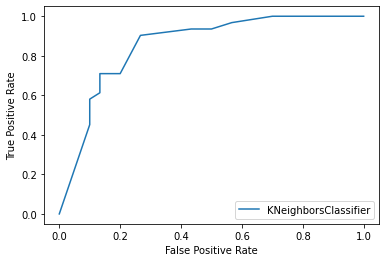

In [15]:
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

# scaling using standardization

In [ ]:
std_scaler=StandardScaler()
x_scaled=std_scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn_model=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
cls_report1=classification_report(y_test,y_pred)
print(cls_report1)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
n_neighbors = list(range(1,100))
p = [1,2]
hyperparameters = dict(n_neighbors = n_neighbors, p = p)
knn_new=KNeighborsClassifier()
rdcv=RandomizedSearchCV(knn_new,hyperparameters,cv=5)
knn_model=rdcv.fit(x_train,y_train)
knn_model.best_estimator_

In [ ]:
y_pred_best=knn_model.predict(x_test)
accuracy_score(y_test,y_pred_best)

In [16]:
y_pred_prob = knn_model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

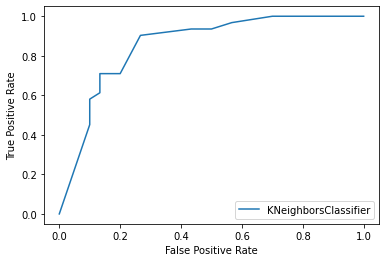

In [17]:
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

# Using Logisctic Regression

In [19]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)
y_pred_train=logistic_model.predict(x_train)

In [20]:
confusion_matrix(y_test,y_pred)

array([[20, 10],
       [ 5, 26]], dtype=int64)

In [21]:
confusion_matrix(y_train,y_pred_train)

array([[ 85,  23],
       [ 11, 123]], dtype=int64)

In [22]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [23]:
cls_report_train=classification_report(y_train,y_pred_train)
print(cls_report_train)

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       108
           1       0.84      0.92      0.88       134

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.86       242
weighted avg       0.86      0.86      0.86       242



In [25]:
accuracy_score(y_test,y_pred)

0.7540983606557377

In [26]:
accuracy_score(y_train,y_pred_train)

0.859504132231405

In [27]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.7526881720430109

In [28]:
y_pred_prob = logistic_model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

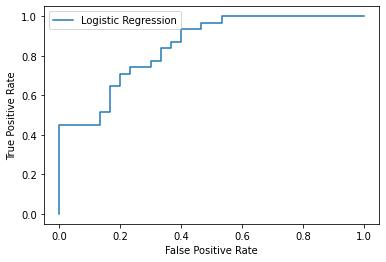

In [29]:
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')